In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
facion_mnist_train=pd.read_csv(r"G:\work\Data science\Deep learning\CSV\fashion-mnist_train.csv")
facion_mnist_test=pd.read_csv(r"G:\work\Data science\Deep learning\CSV\fashion-mnist_test.csv")
facion_mnist_train.info()
print(facion_mnist_train.head())
print(facion_mnist_train.shape)
print(facion_mnist_test.shape)

<class 'pandas.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4     

In [3]:
x_train=facion_mnist_train.drop("label",axis=1)
y_train=facion_mnist_train["label"]
x_test=facion_mnist_test.drop("label",axis=1)
y_test=facion_mnist_test["label"]
x_train=x_train.values.reshape(60000,28,28)/255.0
x_test=x_test.values.reshape(10000,28,28)/255.0


9


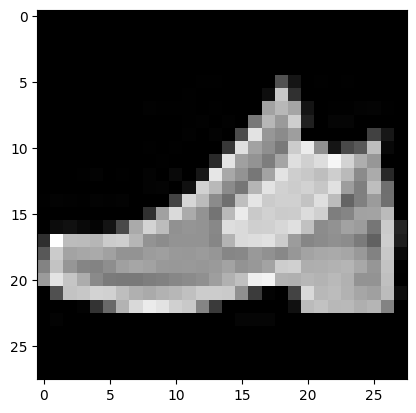

In [4]:
plt.imshow(x_train[1],cmap="gray")
print(y_train[1])

# Defined Model

In [5]:
model=Sequential([
    layers.Flatten(input_shape=[28,28]),
    layers.Dense(100, activation="relu"),
    layers.Dense(75, activation="relu"),
    layers.Dense(10, activation="softmax")
])

g:\work\Data science\Deep learning\tf_cpu\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
print(model.summary())
model.layers
weights,intercept=model.layers[1].get_weights()
print(weights)
print(intercept)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

None
[[ 0.04997332 -0.05835952  0.05581038 ... -0.07192762  0.07657123
   0.06099294]
 [ 0.05471556 -0.01330113  0.02082308 ... -0.02558113 -0.0591149
  -0.04271863]
 [-0.08228033  0.06765883 -0.01843047 ...  0.0240808   0.05783209
   0.00567665]
 ...
 [ 0.03056367  0.01740596 -0.05112896 ... -0.06553113  0.0403733
   0.03462047]
 [ 0.03836465 -0.01388565  0.03205644 ...  0.01162693 -0.01050601
  -0.04583062]
 [ 0.02709493  0.02382745 -0.03819517 ...  0.07579543  0.03415603
   0.05055481]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Compile model

In [7]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Fit model

In [8]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.1)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8188 - loss: 0.5124 - val_accuracy: 0.8523 - val_loss: 0.4310
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8615 - loss: 0.3829 - val_accuracy: 0.8608 - val_loss: 0.3823
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.8740 - loss: 0.3446 - val_accuracy: 0.8702 - val_loss: 0.3637
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.8811 - loss: 0.3222 - val_accuracy: 0.8793 - val_loss: 0.3463
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.8875 - loss: 0.3025 - val_accuracy: 0.8877 - val_loss: 0.3246
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8918 - loss: 0.2903 - val_accuracy: 0.8813 - val_loss: 0.3353
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8986 - loss: 0.2743 - val_accuracy: 0.8865 - val_loss: 0.3214
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.9012 -

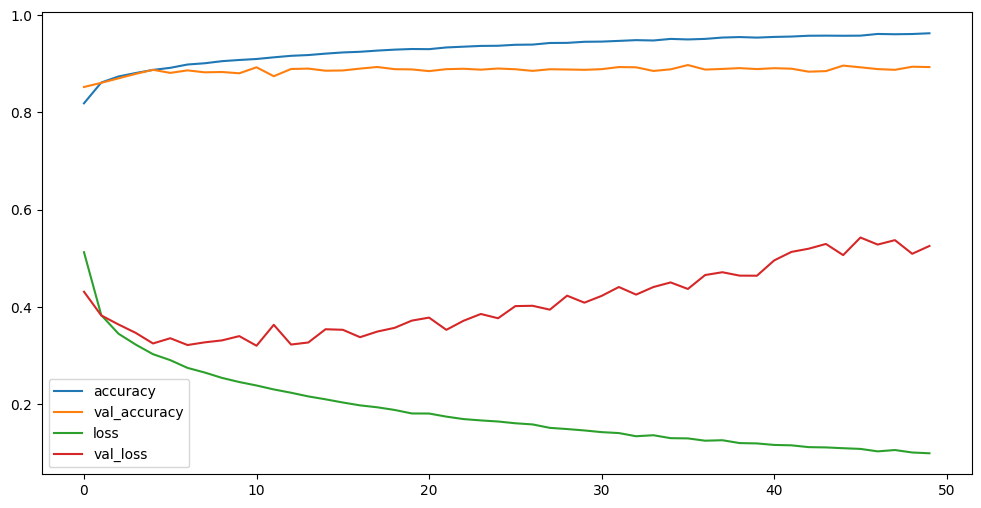

In [9]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(history.history["accuracy"],label="accuracy")
ax.plot(history.history["val_accuracy"],label="val_accuracy")
ax.plot(history.history["loss"],label="loss")
ax.plot(history.history["val_loss"],label="val_loss")
ax.legend()



In [10]:
evaluate=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8977 - loss: 0.5094


0    0
1    1
2    2
Name: label, dtype: int64


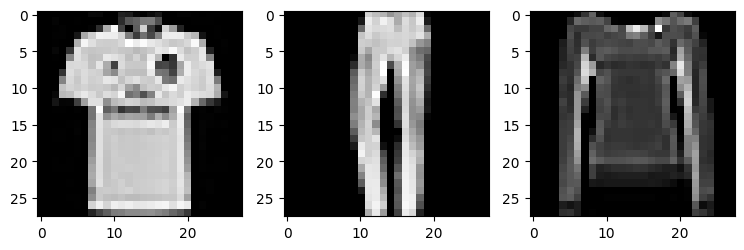

In [11]:
test=x_test[0:3,:,:]
print(y_test[0:3])
fig,ax=plt.subplots(1,3,figsize=(9,3))
for i in range(3):
    ax[i].imshow(test[i],cmap="gray")
plt.show()


In [14]:
predict=model.predict(test)
predict.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.951, 0.   , 0.   , 0.   , 0.   , 0.   , 0.049, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.   ]], dtype=float32)